### Project: Problem Statement - Personal Loan Campaign Modelling

# Thera Bank Personal Loan Campaign

### Data Descritpion:

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Domain:

Banking

### Context: 

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information: 

* ID: Customer ID
* Age: Customer,s age in completed years
* Experience: #years of professional experince
* Income: Annual income of the customer(\$000)
* ZIP Code: Home Address ZIP
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month(\$000)
* Education: Education level. 1: Undergraduate; 2: Graduate; 3. Advanced/Professional;
* Mortgage: Valueof house mortgage if any(\$000)
* Personal loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Doeas the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

### Objective:

The classification goal is to predict the likelihood of a liability customer buying personal loans.

## Stepts and tasks:

### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [88]:
import warnings
warnings.filterwarnings('ignore')

In [130]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [18]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [19]:
#renaming some of the columns name to minimize possibility of missinterpretation of name
df.rename({'ZIP Code': 'ZIP_code','Personal Loan': 'Personal_loan', 'Securities Account': 'Securities_account', 'CD Account': 'CD_account'}, axis=1, inplace=True)
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_loan', 'Securities_account',
       'CD_account', 'Online', 'CreditCard'],
      dtype='object')

In [20]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP_code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_loan           int64
Securities_account      int64
CD_account              int64
Online                  int64
CreditCard              int64
dtype: object

All but one varible in a dataframe are of int64 type and only one - CCAvg is float datatype. All are numerical, however, Education, Mortgage, Personal loan, Securities Account, CD Account Online and CreditCard are dummy variables. Even though ZIP code is numerical Int64 variable, it may be considered as categorical since the ZIP code represent certain city/place and has no other numerical meaning. 

* Some of the  dummy variables should be converted into categorical data type:

In [21]:
categorical=['Education', 'Personal_loan', 
             'Securities_account', 
             'CD_account', 'Online',
            'CreditCard']
for i in categorical:
    df[i]=df[i].astype('category') #changing data types to category for those in a list above
df.dtypes #checking if the dtype has been changed 

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP_code                 int64
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal_loan         category
Securities_account    category
CD_account            category
Online                category
CreditCard            category
dtype: object

In [22]:
col_list=(df.columns[1:].tolist())
col_list.remove('ZIP_code')
df[col_list].describe().T #basic statistics on applicable columns

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


Statistical summary has been done on some of the columns, since it makes no sense on the others (e.g. ID, ZIP codes and dummy varibales on far right side of dataframe)
* Min age is 23 years, max 67. Median and mean values are almost the same (one being 45.0 and the other 45.3384). It may indicate symetrical distribution of ages among clients.
* Min value for experience is -3.0 which is, almost certanly, wrong value and should be 3.0, max value is 43.0 years, mean and mode are again close to each other, which suggest the same cocnlusion as for the age varibale. std deviation is 11.46 years.
* spread of income varibale is much greater then previous two - max value is 224 and min is 8.0. Mean value is slightly greater then median, which might indicate slight right skewness.
* Mortgage has much greater mean value compared to median (which is 0), so distribution might be positive/right skewed





In [23]:
df.shape

(5000, 14)

- df has 5000 rows (cases) and 14 columns(variables/attributes)

In [24]:
df.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP_code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal_loan         False
Securities_account    False
CD_account            False
Online                False
CreditCard            False
dtype: bool

- There are no null values in dataframe

In [25]:
print('Number of inputs whit negative years of experience is %d.' % (df[df['Experience']<0].shape[0]))

Number of inputs whit negative years of experience is 52.


Since there were -3.0 identified as minimum for experience, the check have been run to identify how many of entries are there with negative years of experience. The result showed there are 52 such entries which might be considered as incorrect.

### 2. EDA: Study the data distribution in each attribute and target variable, share your findings

* Number of unique in each column
* Number of people with zero mortgage
* Number of people with zero credit card spendingper month
* Value counts of all categorical columns
* Univariate and Bivariate
* Get data model ready

#### 2.1 Number of unique in each column

In [26]:
for i in df.columns:
    print('Number of unique values in %s column is %d'%(i, len(df[i].unique())))

Number of unique values in ID column is 5000
Number of unique values in Age column is 45
Number of unique values in Experience column is 47
Number of unique values in Income column is 162
Number of unique values in ZIP_code column is 467
Number of unique values in Family column is 4
Number of unique values in CCAvg column is 108
Number of unique values in Education column is 3
Number of unique values in Mortgage column is 347
Number of unique values in Personal_loan column is 2
Number of unique values in Securities_account column is 2
Number of unique values in CD_account column is 2
Number of unique values in Online column is 2
Number of unique values in CreditCard column is 2


Some of the columns have only 2 unique values. It has been expected since those are dummy varibales - Personal_loan, Securities_account, CD_Account, Online, CreditCard. Those are all varibales answering to the question with YES or NO. Educiation has 3 unique values as expected. Family column, although not a dummy varibale in a sense there are no categories of families but rather the number of family members (a real quantitative variable), it has only four unique values. It is interesting to notice the ZIP column have 467 unique values. It may be possible to reduce number of unique values if the ZIP codes would be grouped based on first two or three digits. In any case, it is a categorical variable, number has no other meaning but giving the location. 

#### 2.2 Number of people with zero mortgage

In [27]:
print ('Number of people with zero mortgage is %d.' % (len(df[df['Mortgage']==0]['ID'].unique())))

Number of people with zero mortgage is 3462.


#### 2.3 Number of people with zero credit card spending per month

In [28]:
print('- total number of people with zero credit card spending per month is %d;'%(len(df[df['CCAvg']==0]['ID'])))
print('- number of people with zero credit card spending per month who have credit card is %d.'%(df[(df['CCAvg']==0) & (df['CreditCard']==1)]['ID'].shape[0]))

- total number of people with zero credit card spending per month is 106;
- number of people with zero credit card spending per month who have credit card is 28.


#### 2.4 Value counts of all categorical columns 

In [29]:
categorical=['Education', 'Personal_loan', 
             'Securities_account', 
             'CD_account', 'Online',
            'CreditCard']
for i in categorical:
    print('--------------------------------------')
    print ('Number of each value in %s column is' % (i) )
    print(df[i].value_counts())
    print ('Percentage of each value is')
    print(100*(df[i].value_counts()/df[i].value_counts().sum()))
    print('--------------------------------------')

--------------------------------------
Number of each value in Education column is
1    2096
3    1501
2    1403
Name: Education, dtype: int64
Percentage of each value is
1    41.92
3    30.02
2    28.06
Name: Education, dtype: float64
--------------------------------------
--------------------------------------
Number of each value in Personal_loan column is
0    4520
1     480
Name: Personal_loan, dtype: int64
Percentage of each value is
0    90.4
1     9.6
Name: Personal_loan, dtype: float64
--------------------------------------
--------------------------------------
Number of each value in Securities_account column is
0    4478
1     522
Name: Securities_account, dtype: int64
Percentage of each value is
0    89.56
1    10.44
Name: Securities_account, dtype: float64
--------------------------------------
--------------------------------------
Number of each value in CD_account column is
0    4698
1     302
Name: CD_account, dtype: int64
Percentage of each value is
0    93.96
1     

Most of categories are imbalanced, e.g. Securities_account, CD_account and Personal_loan are highly imbalanced. Personal_loan is of particular interest, since it is our targeted categorical value.

#### 2.5 Univariate and bivariate

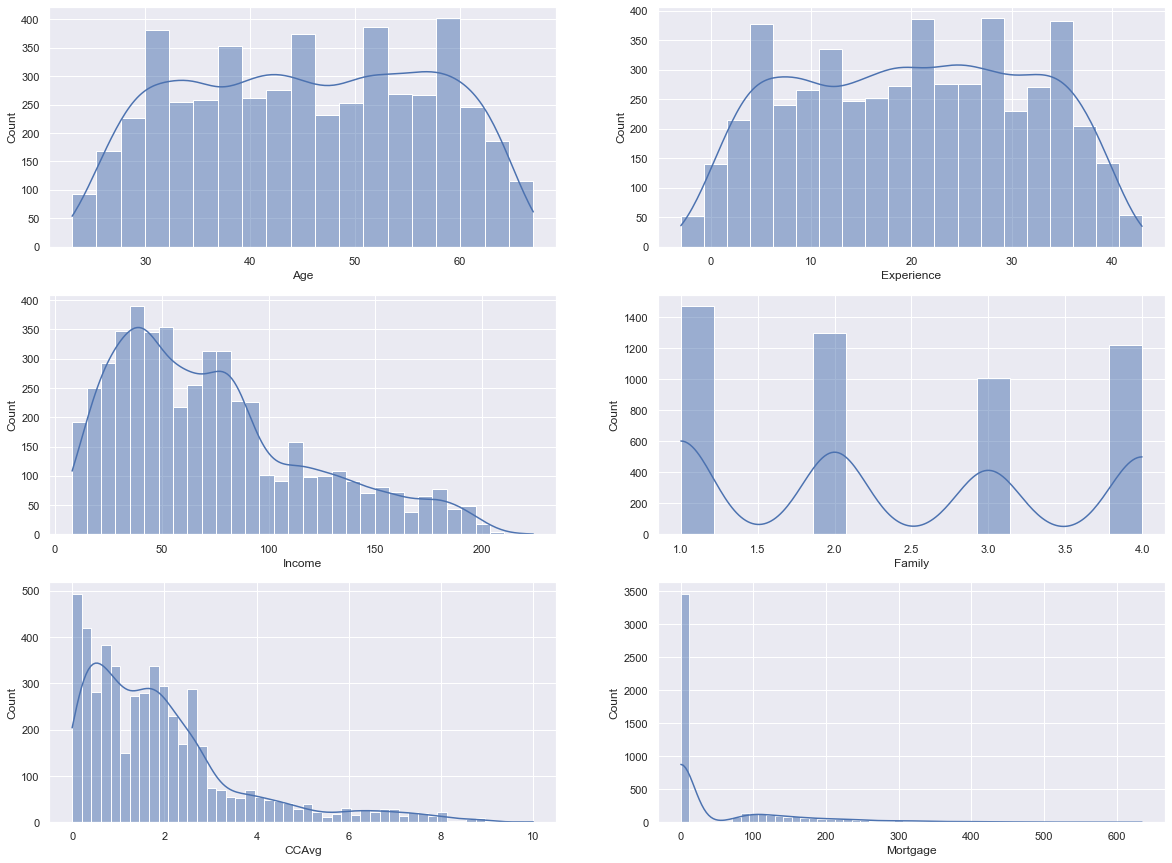

In [30]:
fig, axs=plt.subplots(nrows=3, ncols=2, figsize=(20,15))
row=0
col=0
for i in ['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Mortgage']:
    sns.histplot(df[i],ax=axs[row][col], kde=True)
    if col==1:
        row=row+1
        col=0
    else:
        col=col+1

It can be easily seen the income is positively/right skewed. The same is with CCAvg. Age and experinece follows similar distribution. Majority of the clients has no mortage. Families are fairly evenly distributed, with most of them having only 1 member, and least of them having 3 members. 

<AxesSubplot:>

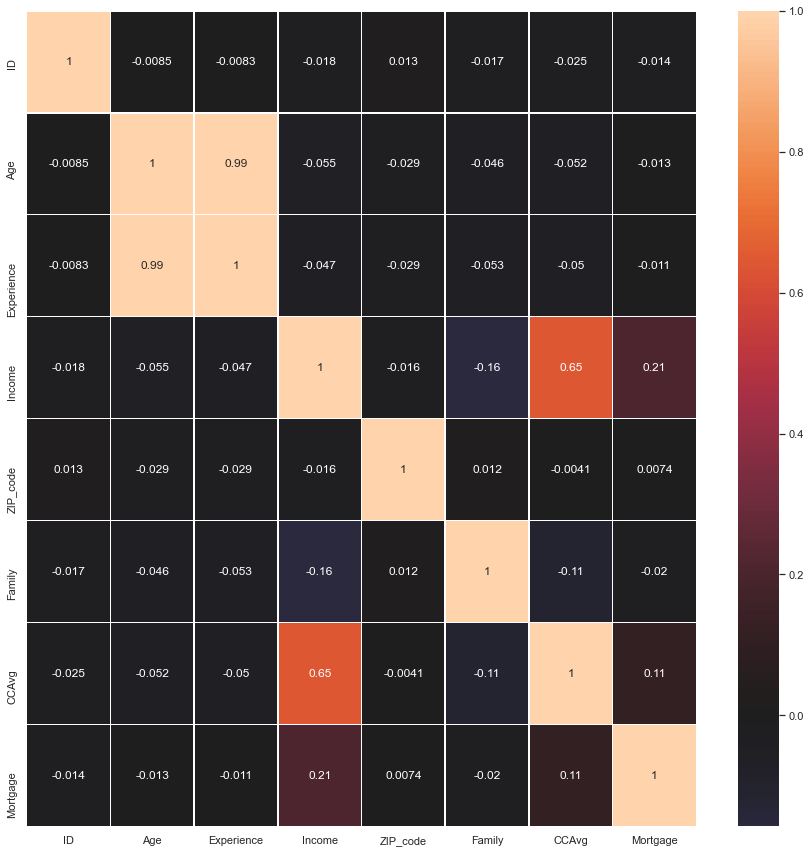

In [31]:
fig, ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, center=0, linewidths=0.5)

From correlation heatmap (where the color codes are centered around 0) it can be easily seen that experiennce and age are highly correlated. Average spending on a credit card is fairly corrleated with income, but for the rest, the correlation is low or practicaly non existent. From logistic regression training perspective, there is no point of using experience and age togehter, because those two varibales could not be considered as independent. 

In [32]:
df.groupby('Personal_loan').mean()

,ID,Age,Experience,Income,ZIP_code,Family,CCAvg,Mortgage
Personal_loan,,,,,,,,
0,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,51.789381
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,100.845833


In [33]:
df.groupby('Personal_loan').median()

,ID,Age,Experience,Income,ZIP_code,Family,CCAvg,Mortgage
Personal_loan,,,,,,,,
0,2518.5,45.0,20.0,59.0,93437.0,2.0,1.4,0.0
1,2342.0,45.0,20.0,142.5,93407.0,3.0,3.8,0.0


* there is no differnece between customers who accepted loan during last campaign with regards to age, experience and family size, however, customers who, on averaege, earn more, spend more on credit card and have higher mortgage accepted the loan;
* correlation between Personal_loan and Income, CCAvg or Mortgage was not high, probably due to highly imbalanced Personal_loan, however, when those variables  are grouped by Personal_loan there are clear differences between two classes of it;

<AxesSubplot:xlabel='Personal_loan', ylabel='count'>

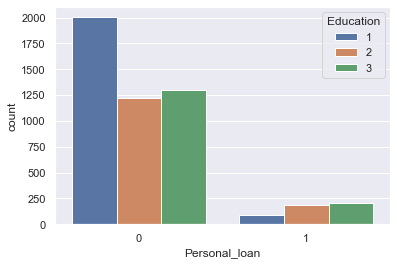

In [94]:
sns. countplot(df['Personal_loan'], hue=df['Education'])

Even though correlation is hard to establsihed on Personal_loan, most probably, because of unbalanced data, there are indications that peopel with lower education have less tendency to accept loan. 

#### 2.6 Get data model ready

#### Grouping ZIP_codes to bins based on larger area (practicaly dividing it by 1000)

In [34]:
df['ZIP_code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP_code, Length: 467, dtype: int64

In [35]:
(divmod(df['ZIP_code'],1000)[0]).value_counts()

94    1472
92     988
95     815
90     703
91     565
93     416
96      40
9        1
Name: ZIP_code, dtype: int64

In [64]:
df_modified=df.copy()

In [65]:
df_modified['area']=divmod(df['ZIP_code'],1000)[0]
#df_modified['area']=df.astype('category')


In [66]:
df_modified=df_modified.drop(['ZIP_code'],axis=1)


#### generating dummy variables out of Area, Education and Family

In [67]:
df_modified=pd.get_dummies(data=df_modified, drop_first=True, prefix='Area', columns=['area'])
df_modified=pd.get_dummies(data=df_modified, drop_first=True, prefix='Family', columns=['Family'])
df_modified=pd.get_dummies(data=df_modified, drop_first=True, prefix='Education', columns=['Education'])

In [68]:
df_modified

,ID,Age,Experience,Income,CCAvg,Mortgage,Personal_loan,Securities_account,CD_account,Online,...,Area_92,Area_93,Area_94,Area_95,Area_96,Family_2,Family_3,Family_4,Education_2,Education_3
0,1,25,1,49,1.6,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,45,19,34,1.5,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,39,15,11,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,35,9,100,2.7,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,5,35,8,45,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1.9,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4996,4997,30,4,15,0.4,85,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4997,4998,63,39,24,0.3,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4998,4999,65,40,49,0.5,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


- All negative values for experience must be changed to positive by applying absolute function
- Both dataframes will be used (df and df_modified) just for the comparison between models trained with both dataframes

In [71]:
df['Experience']=abs(df['Experience'])
df[df['Experience']<0]['Experience'].any()#checking if all negative values have been transformed

False

In [72]:
df_modified['Experience']=abs(df['Experience'])
df_modified[df_modified['Experience']<0]['Experience'].any()#checking if all negative values have been transformed

False

### 3. Split the data into trainning and test sets in the ratio of 70:30 respectively

* df

In [79]:
X1=df.drop(['ID', 'ZIP_code', 'Personal_loan', 'Age'], axis=1)
Y1=df['Personal_loan']
x1_train, x1_test, y1_train, y1_test=train_test_split(X1, Y1, test_size=0.3)
x1_train.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_account,CD_account,Online,CreditCard
2462,28,23,3,0.4,1,0,0,0,1,0
413,7,42,3,2.3,1,0,0,0,1,0
2388,39,23,3,0.5,1,0,1,0,0,0
3829,39,44,1,0.5,3,0,0,0,1,1
4994,40,75,3,2.0,3,0,0,0,1,0


* df_modified

In [80]:
X2=df_modified.drop(['ID', 'Personal_loan', 'Age'], axis=1)
Y2=df['Personal_loan']
x2_train, x2_test, y2_train, y2_test=train_test_split(X2, Y2, test_size=0.3)
x2_train.head()

,Experience,Income,CCAvg,Mortgage,Securities_account,CD_account,Online,CreditCard,Area_90,Area_91,Area_92,Area_93,Area_94,Area_95,Area_96,Family_2,Family_3,Family_4,Education_2,Education_3
318,2,110,1.8,190,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3334,14,30,0.8,86,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
850,20,39,0.2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1908,26,22,0.5,112,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0
1095,25,43,1.4,137,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


Training and test data have been prepared based on adjusted dataset. Adjustment was composed of removing of unwanted columns like ID and ZIP_code (this one have been previously removed from df_modified) and targeted variable (Personal_loan). In addition, the age has been removed since experience is highly correlated wiuth the age. For a result, a Personal_loan has been taken (Y dataframe).
Training and test sets have been generated in ratio of 70:30.

* df

In [81]:
print('Portion of training data is', len(x1_train)/len(X1)*100,'percent')
print('Portion of testing data is', len(x1_test)/len(X1)*100,'percent')

Portion of training data is 70.0 percent
Portion of testing data is 30.0 percent


* df_modified

In [82]:
print('Portion of training data is', len(x2_train)/len(X2)*100,'percent')
print('Portion of testing data is', len(x2_test)/len(X2)*100,'percent')

Portion of training data is 70.0 percent
Portion of testing data is 30.0 percent


Check has been done on portion of training and test data compared to full set.

* first for the df:

In [83]:
categorical=['Education', 'Securities_account', 
             'CD_account', 'Online',
            'CreditCard']
for i in categorical:
    print('COLUMN ', i, ':')
    print ('Percentage of each value in originala data')
    print(100*(df[i].value_counts()/df[i].value_counts().sum()))
    print ('Percentage of each value in training data')
    print(100*(x_train[i].value_counts()/x_train[i].value_counts().sum()))
    print ('Percentage of each value in test data')
    print(100*(x_test[i].value_counts()/x_test[i].value_counts().sum()))

    print('--------------------------------------')

COLUMN  Education :
Percentage of each value in originala data
1    41.92
3    30.02
2    28.06
Name: Education, dtype: float64
Percentage of each value in training data
1    41.742857
3    29.571429
2    28.685714
Name: Education, dtype: float64
Percentage of each value in test data
1    42.333333
3    31.066667
2    26.600000
Name: Education, dtype: float64
--------------------------------------
COLUMN  Securities_account :
Percentage of each value in originala data
0    89.56
1    10.44
Name: Securities_account, dtype: float64
Percentage of each value in training data
0    89.8
1    10.2
Name: Securities_account, dtype: float64
Percentage of each value in test data
0    89.0
1    11.0
Name: Securities_account, dtype: float64
--------------------------------------
COLUMN  CD_account :
Percentage of each value in originala data
0    93.96
1     6.04
Name: CD_account, dtype: float64
Percentage of each value in training data
0    94.0
1     6.0
Name: CD_account, dtype: float64
Percentag

Representativness of training and test sets have been verified by checking the percentage of each category in original data, training data and test data. It can be concluded those percentages are similar in test data and train data compared to original data, so it might be concluded the training data and testing data are good representatives of original data. 

### 4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not.
* Print all the metrics related to evaluation of the model performance (accuracy, recall, precission, f1score and ROC_AUC_score).
* Draw a heatmap to display confusion matrix

In [100]:
#generating a model (based on df)
model1=LogisticRegression(solver="liblinear", class_weight='balanced', random_state=1)
model1.fit(x1_train, y1_train)

#prediction based on model
y1_predict=model1.predict(x1_test)


In [111]:
#generating a model (based on df_modified)
model2=LogisticRegression(solver="liblinear", class_weight='balanced', random_state=1)
model2.fit(x2_train, y2_train)

#prediction based on model
y2_predict=model.predict(x2_test)

In both cases class_weight has been set to balanced since the data set is imbalanced. The reason to use balanced class_weigh is because it was the easiest way to set weighes of each class as it is set inverserly proportional to class frequencies.

In [139]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

In [112]:
print ('accuracy on test data of model 1 is', model1.score(x1_test, y1_test))
print ('accuracy on test data of model 2 is', model2.score(x2_test, y2_test))

accuracy on test data of model 1 is 0.8966666666666666
accuracy on test data of model 2 is 0.898


In [118]:
print('recall for model 1 is', recall_score(y1_test, y1_predict))
print('recall for model 2 is', recall_score(y2_test, y2_predict))

recall for model 1 is 0.9102564102564102
recall for model 2 is 0.6644736842105263


In [119]:
print('precision for model 1 is', precision_score(y1_test, y1_predict))
print('precision for model 2 is', precision_score(y2_test, y2_predict))

precision for model 1 is 0.5017667844522968
precision for model 2 is 0.8938053097345132


In [122]:
print('f1 score for model 1 is', f1_score(y1_test, y1_predict))
print('f1 score for model 2 is', f1_score(y2_test, y2_predict))

f1 score for model 1 is 0.6469248291571755
f1 score for model 2 is 0.7622641509433962


In [123]:
print('roc auc score for model 1 is', roc_auc_score(y1_test, y1_predict))
print('roc auc score for model 2 is', roc_auc_score(y2_test, y2_predict))

roc auc score for model 1 is 0.9026728479853479
roc auc score for model 2 is 0.8277858035295955


In [128]:
confusion_matrix(y1_test, y1_predict)

array([[1203,  141],
       [  14,  142]], dtype=int64)

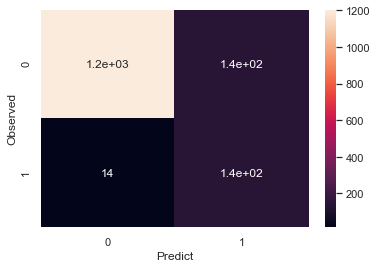

In [126]:
#confusion matrix for model 1:
sns.heatmap(confusion_matrix(y1_test, y1_predict), annot=True, xticklabels = [0,1] , yticklabels = [0,1])
plt.ylabel('Observed')
plt.xlabel('Predict')
plt.show()

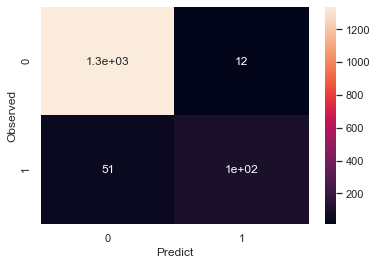

In [127]:
#confusion matrix for model 2:
sns.heatmap(confusion_matrix(y2_test, y2_predict), annot=True, xticklabels = [0,1] , yticklabels = [0,1])
plt.ylabel('Observed')
plt.xlabel('Predict')
plt.show()

### 5. Find out coefficients of all the attributes and show the output in a dataframe with column names. For test data show all the rows where the predicted class is not equal to the observed class

#### Coefficients of all attributes
* Output is shown in a form of dataframe whit column names

In [133]:
#coefficients of model 1
coefficient_df_model_1=pd.DataFrame(model1.coef_, columns=X1.columns)
coefficient_df_model_1

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_account,CD_account,Online,CreditCard
0,-0.001863,0.046454,0.448898,0.2093,1.074253,0.000794,-0.860107,3.198721,-0.741138,-0.960211


In [135]:
#coefficients of model 2
coefficient_df_model_2=pd.DataFrame(model2.coef_, columns=X2.columns)
coefficient_df_model_2

,Experience,Income,CCAvg,Mortgage,Securities_account,CD_account,Online,CreditCard,Area_90,Area_91,Area_92,Area_93,Area_94,Area_95,Area_96,Family_2,Family_3,Family_4,Education_2,Education_3
0,-0.004341,0.054647,0.178559,0.000693,-0.785586,2.963262,-0.701054,-0.724472,-0.696104,-1.236831,-0.750772,-1.32953,-0.986325,-1.09665,-1.013157,-0.359562,1.312915,1.301628,2.293939,2.447636


#### Showing all the rows where predicted class is not equal to observed class
* x(1/2)_test and y1(1/2)_test must be concatenated and new column 'Predicition' has o be added. 

In [136]:
test_predict_df=pd.concat([x1_test, y1_test], axis=1)
test_predict_df['Predict']=y1_predict
test_predict_df[test_predict_df['Personal_loan']!=test_predict_df['Predict']]

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_account,CD_account,Online,CreditCard,Personal_loan,Predict
1129,4,73,3,3.3,1,0,0,1,1,1,1,0
2833,22,152,2,1.4,1,0,0,0,1,0,0,1
3013,21,183,2,1.4,1,0,0,0,1,1,0,1
1379,37,162,1,1.3,1,0,0,0,1,0,0,1
4700,7,170,1,6.0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2024,12,113,4,0.2,1,0,0,0,0,0,1,0
4604,7,81,2,3.4,2,0,0,0,0,1,1,0
793,2,150,2,2.0,1,0,0,0,1,0,0,1
3920,8,82,2,1.5,3,0,1,1,1,1,0,1


In [137]:
test_predict_df_modified=pd.concat([x2_test, y2_test], axis=1)
test_predict_df_modified['Predict']=y2_predict
test_predict_df_modified[test_predict_df_modified['Personal_loan']!=test_predict_df_modified['Predict']]

,Experience,Income,CCAvg,Mortgage,Securities_account,CD_account,Online,CreditCard,Area_90,Area_91,...,Area_94,Area_95,Area_96,Family_2,Family_3,Family_4,Education_2,Education_3,Personal_loan,Predict
951,34,83,3.4,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,1,0
1225,6,118,2.8,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3312,22,190,8.8,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1328,36,145,6.9,380,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1784,29,119,2.0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,8,104,3.7,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
2285,22,114,2.4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3039,9,141,4.9,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
1177,3,71,3.3,149,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0


### 6. Give conclusion related to the Business understanding of your model.

#### meaing of confusion matrix:
- True positive (observed=1, predicted=1) - Prediction was that the customer will be offered a loan and will take a loan (the offer was not wasted);
- False positive (observed=0, predicted=1) - Prediction was that the customer will be offered a loan and he/she will not take a loan (the offer was wasted);
- True Negative (observed=0, predicted=1) - Prediction was that customer will not be offered a loan correctly (the offer was not wasted);
- False Negative (observed=1, predicted=0) - The prediction was that the cusotmer will not be offered a loan, while he/she would take a loan (in this case it is the worst error beacuse of the loss of possible profit)

#### important features
* possession of CD_account, credit card securities account or level of education have highest impact on the output of model 1, while for model 2, besides possession of CD_account, Education_2, Education_3, Family_4 and Family_3 contribute mostly. In additin, it can be seen that areas contribute to output of model 2 much more compared to experience or income.   


#### important metrics

The bank wants to offer a loan to clients. If clinets reject the offer the only loss is loss of time to make an offer, however, if the offer is not given to clients that will accept it, the loss is more significant, since the profit of credit is lost. In this context, the most expensive error is typeII error - false negative, and, hence the specificity (or recall of negative class) is most important. Based on this, it can be concluded that model 1 (the one without taking into account ZIP_code) is more suitable even though accuracy of model 2 is greater than the one of model 1. 